In [1]:
%load_ext autoreload
%autoreload 2

------------------------------

## Config

In [2]:
import sys

In [3]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

In [4]:
from Util import to_log2_tpm
from Util import long_header

------

# Create tSNE Plots

In this notebook we visualize **3 cases** of `2-d embedding` (dimensionality reduction) of **WT + 6 mutant samples** (7 data points), from the following `higher dimensional space`:
-  **Transcription efficiency** (TE) of Heterochromatic genes `(~24 dim)`
-  **Pol II ChIP occupancy** (PO) of Heterochromatic genes `(~24 dim)`
-  Both, **Transcription efficiency** (TE) and **Pol II ChIP occupancy** (PO) of Heterochromatic genes `(~48 dim)`

This Notebook is used to generate the following **tSNE Plot** from the manuscript:
- **Figure5**: 
    - tSNE Transcription efficiency and Pol II ChIP occupancy - **Figure5-A_stranded**

### <font color='blue'> **Attention!** In this Notebook we are analyzing a mix of **ratios** AND **absolute expression** </font>

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

----

Select **Colors**:
- `chp2` (324), ` mit1` (491) and `clr3` (302) similar colors  
- `swi6` (301) and `clr4` (80) similar (maybe not too different to the other group, for example green and blue, or blue and purple, or red and orange...) 
- `exo2` (530) and `rrp6` (504) similar but different to the others.
- `ago1` (638) and `caf1` (510/591) can be completely different.
- `ccr4` (544), `caf1` (510/591), `mot2` (1022) yellowish

In [7]:
color_map = {'1022':'goldenrod', # missing (mot2Δ) => not anymore!
             #'1168':'blueviolet', # missing (caf1*ccr4*)
             '301':'lightcoral',
             '302':'coral',
             '324':'orangered', 
             '491':'tomato',
             '504':'green',
             '510':'gold', # original caf1Δ
             #'523':'blueviolet', # missing
             #'524':'blueviolet', # missing
             '530':'darkolivegreen',
             '544':'khaki', # missing (ccr4Δ) => not anymore!
             #'591':'gold', # also caf1Δ, grouped with 510
             '638':'blueviolet',
             '80':'indianred', 
             'WT':'gray'}

![named_color](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png)

In [8]:
names  = ['80',    '638',   '301',   '324',   '491',   '302',   '504',   '530',   '510',   '544',   '1022',  'WT']
labels = ['clr4Δ', 'ago1Δ', 'swi6Δ', 'chp2Δ', 'mit1Δ', 'clr3Δ', 'rrp6Δ', 'exo2Δ', 'caf1Δ', 'ccr4Δ', 'mot2Δ', 'wt']

t-SNE has a hyper-parameter called **perplexity**. Perplexity balances the attention t-SNE gives to local and global aspects of the data and can have large effects on the resulting plot. A few notes on this parameter:
* It is roughly a guess of the number of close neighbors each point has. Thus, a denser dataset usually requires a higher perplexity value.
* It is recommended to be between 5 and 50.
* It should be smaller than the number of data points.

**The biggest mistake people make with t-SNE is only using one value for perplexity and not testing how the results change with other values**.

If choosing different values between 5 and 50 significantly change your interpretation of the data, then you should consider other ways to visualize or validate your hypothesis.

In [9]:
def tsne_plot(df, names, labels=None, random_state=1, color=None, title='', outpath=None, perplexity=2, **kwargs):
    
    ## bad - I rather removed those.
    df = df.fillna(0)
    #df = df.dropna(how="any", subset=names)
    #import pdb; pdb.set_trace()
    
    matrix = df[names].values.T
    transformer = TSNE(random_state=random_state, perplexity=perplexity, n_iter=5000, init = "pca")#, early_exaggeration=6)
    tsne = transformer.fit_transform(matrix)
    X = [i for i,j in tsne]
    Y = [j for i,j in tsne]
    
    if not labels:
        labels = names
        
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_linewidth(3)
    
    ax.set_ylabel('Component 2', fontsize=40, labelpad=20)
    ax.set_xlabel('Component 1', fontsize=40, labelpad=20)
    
    plt.xticks(fontsize=35, rotation=45)
    plt.yticks(fontsize=35)

    plt.suptitle(title, fontsize=20, y=1)
    for idx in range(0, len(names)):
        ax.annotate(labels[idx], (X[idx], Y[idx]),
        #ax.annotate('', (X[idx], Y[idx]), 
                    fontsize=25, textcoords="offset points",
                    xytext=(10, 10), ha='right', style='italic')
        plt.plot(X[idx], Y[idx], 'o', markersize=30, c=color_map[names[idx]])
        
    if outpath:
        plt.savefig(outpath, bbox_inches='tight')
        plt.savefig(outpath.split('.')[0]+'.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [10]:
def pca_plot(df, names, labels=None, random_state=1, color=None, title='', outpath=None, **kwargs):
    
    ## bad - I rather removed those.
    df = df.fillna(0)
    #df = df.dropna(how="any", subset=names)
    #import pdb; pdb.set_trace()

    #matrix = df[names].values.T
    #transformer = PCA(random_state = 1, n_components=2, whiten=True)
    #pca = transformer.fit_transform(matrix)
    #X = [i for i,j in pca]
    #Y = [j for i,j in pca]
    
    X = df[names].values.T
    #pca = PCA(random_state = 1, n_components=2, whiten=True)
    pca = PCA(random_state = 1, whiten=True)
    pca.fit(X)
    X = pca.transform(X)
    x = [x[0] for x in X]
    y = [x[1] for x in X]
    
    if not labels:
        labels = names

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))

    ax1.spines['top'].set_linewidth(3)
    ax1.spines['right'].set_linewidth(3)
    ax1.spines['bottom'].set_linewidth(3)
    ax1.spines['left'].set_linewidth(3)

    ax1.set_ylabel('Component 2', fontsize=40, labelpad=20)
    ax1.set_xlabel('Component 1', fontsize=40, labelpad=20)

    plt.xticks(fontsize=35, rotation=45)
    plt.yticks(fontsize=35)

    plt.suptitle(title, fontsize=20, y=1)

    for idx in range(0, len(names)):
        ax1.annotate(labels[idx], (x[idx], y[idx]),
                    fontsize=25, textcoords="offset points",
                    xytext=(10, 10), ha='right', style='italic')
        ax1.plot(x[idx], y[idx], 'o', markersize=30, c=color_map[names[idx]])

    if outpath:
        plt.savefig(outpath, bbox_inches='tight')
        plt.savefig(outpath.split('.')[0]+'.pdf', format='pdf', bbox_inches='tight')
    
    ax2.plot(np.cumsum(pca.explained_variance_ratio_))
    ax2.set_xlabel('Number of components', fontsize=40, labelpad=20)
    ax2.set_ylabel('Cumulative explained variance', fontsize=40, labelpad=20)
    ax2.yaxis.set_label_position("right")
    
    plt.show()

---

# **I.** **Transcription efficiency** (TE):

---

- **Import** Transcription Efficiency data: `transcription_efficiency.csv`


In [11]:
te_file = os.path.join(ratios_dir, 'transcription_efficiency.csv')
te_file

'/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/transcription_efficiency.csv'

In [12]:
#te_df = pd.read_csv('/data/parastou/RNAdeg/results/RipChip/xp_data/transcription_efficiency.csv', sep='\t')
te_df = pd.read_csv(te_file, sep='\t')
te_df.head()
#te_df

,gene_id,gene_name,length,type,category,bio_type,1022,1168,301,302,324,491,504,510,523,530,544,638,80,WT
0,FP565355_region_1..2120,NaN,2120,region,repeat,region,0.358903,0.049082,0.170271,0.062029,0.083316,0.055166,0.073347,0.231235,0.053812,0.030326,0.730143,0.100357,0.144801,0.045835
1,FP565355_region_15417..15473,NaN,57,region,repeat,region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.159937,NaN,NaN,NaN,NaN,NaN
2,FP565355_region_15474..15608,NaN,135,region,repeat,region,0.078542,0.189788,0.393205,0.082533,0.109532,0.132110,0.193087,0.069192,0.060826,0.032955,0.246863,0.052037,0.139404,0.546394
3,FP565355_region_15609..16735,NaN,1127,region,repeat,region,0.354282,0.801533,0.201412,0.110041,0.257788,0.104558,0.045656,0.461440,0.114019,0.128023,0.478776,0.132112,0.411515,0.015965
4,FP565355_region_16736..16794,NaN,59,region,repeat,region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
te_df.shape

(5159, 20)

- Get **sample columns** for filtering `NA`s properly:

In [14]:
init_sample_cols = [ss for ss in te_df.columns.tolist() if ss not in long_header]

In [15]:
# Check if TE ratio is not well defined for any mutants. All NaNs
te_df = te_df.dropna(axis=1, how='all')

In [16]:
# get sample_cols after filtering
sample_cols = [ss for ss in te_df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

14

In [17]:
print('Ignoring samples: {} TE ratio is not well defined!'.format(set(init_sample_cols).difference(sample_cols)))

Ignoring samples: set() TE ratio is not well defined!


In [18]:
#df[df['gene_id'].isin(non_degraded)][[xx for xx in df.columns if ('80' in xx) | (xx == 'gene_id') | (xx == 'category')]]

#### <font color='red'> Deal with **NAs**: *Drop* or *fill with zeros?* </font>
- <font color='red'> `NaN's` originated from **division by zero**: drop `NaN's` </font>

In [19]:
# (NOT USED)
#te_df = te_df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#te_df = te_df.fillna({kk:0 for kk in sample_cols})

# drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
# => why not fillna(0) like before, in `GXP_BoxPlots.ipynb`?
te_df = te_df.dropna(subset = sample_cols) 
#te_df = te_df.dropna(0)

In [20]:
#te_df[te_df[sample_cols].isnull().any(1)]

In [21]:
te_df.shape

(5025, 20)

In [22]:
# no surprises!
# => there should not be NAs in sample columns (with counts)
assert not te_df[sample_cols].isnull().values.any()

Filter for **Heterochromatic** genes **Log-transform** count matrix

In [23]:
# Keep only Heterochromatic genes
#te_df = te_df[te_df['gene-name'].isin(het_genes)]
te_df = te_df[te_df['gene_id'].isin(het_genes)]

# remove regions add too much noise:
te_df = te_df[te_df['type'] != 'region']

#te_df = to_log2_tpm(te_df)
te_df = to_log2_tpm(te_df, gene_id_col='gene_id', shift=1)

te_df

,gene_id,gene_name,length,type,category,bio_type,1022,1168,301,302,324,491,504,510,523,530,544,638,80,WT
849,SPAC212.01c,NaN,920,gene,repeat,mRNA,0.599458,0.758049,0.552137,0.616837,0.496471,0.547371,0.519914,0.646237,0.160111,0.325390,0.929948,0.490776,0.517269,0.456759
850,SPAC212.02,NaN,411,gene,repeat,mRNA,0.055001,0.090009,0.416357,0.602825,0.166183,0.428026,0.359026,0.342478,0.048943,1.511390,1.127091,0.153169,0.987225,0.261451
851,SPAC212.03,NaN,466,gene,repeat,mRNA,0.470537,0.366028,0.098509,0.178971,0.166127,0.199053,0.458976,0.356586,0.118416,0.490741,0.285874,0.087482,0.339385,0.050648
852,SPAC212.04c,NaN,1670,gene,repeat,mRNA,0.564789,0.568096,0.547024,0.543542,0.434323,0.399763,0.468490,0.615107,0.127927,0.384874,0.768424,0.471402,0.536182,0.442061
854,SPAC212.06c,NaN,933,gene,repeat,mRNA,0.633723,0.270184,0.298995,1.030346,0.588477,0.457982,0.195845,0.885603,0.280192,0.248196,0.702742,1.330300,0.700311,0.110772
856,SPAC212.08c,NaN,1211,gene,repeat,mRNA,0.352757,0.966194,0.298942,0.619476,0.292461,0.461190,0.139224,0.656907,0.243166,0.267061,0.810589,0.518449,0.613474,0.136827
857,SPAC212.09c,NaN,1656,gene,repeat,pseudogenic_transcript,0.808454,0.771402,0.650154,0.692281,0.689270,0.807524,0.294749,0.879149,0.339426,0.322759,1.051462,1.053454,0.839059,0.326890
858,SPAC212.10,NaN,606,gene,repeat,pseudogenic_transcript,0.409888,0.835133,0.706022,0.790516,0.723215,0.737474,0.080997,0.758350,0.274585,0.173058,1.051056,1.084842,0.729890,0.100321
859,SPAC212.10b,SPAC212.10_plus,606,gene,repeat,pseudogenic_transcript,0.279410,0.443235,0.217338,0.444291,0.356577,0.418759,0.085744,0.357515,0.063146,0.039022,0.111481,0.122952,0.265414,0.026631
860,SPAC212.11,tlh1,5662,gene,repeat,mRNA,0.694605,0.718052,0.564312,1.552082,0.826846,0.785745,0.197060,1.159434,0.444285,0.289641,0.853609,1.890885,1.052157,0.194161


In [24]:
te_df.shape

(24, 20)

- Plot 2-d `tSNE` **dimensionality reduction** from `~24 dim`

In [25]:
fig_dir = os.path.join(plots_dir, 'Figure5')
if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [26]:
out_dir = plots_dir
out_dir = fig_dir

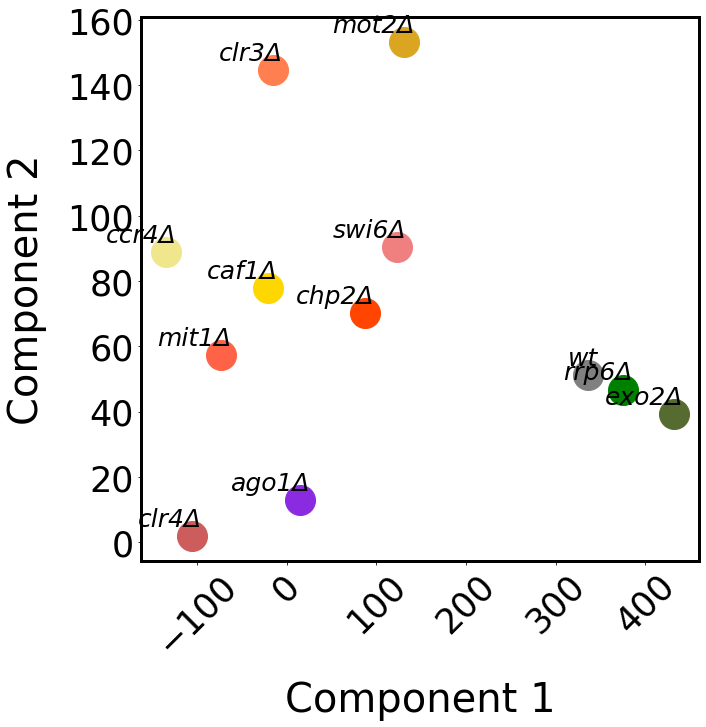

In [27]:
tsne_plot(
    te_df, names, 
    labels=labels,
    title='',
    outpath=os.path.join(out_dir, 'tsne_transcription_efficiency.png')
)

----

## **II.** **Pol II ChIP occupancy** (PO)

---

- **Import** Pol II ChIP Occupancy (PO) data: `chip_merged_tpm.csv`

In [28]:
#chip_file='/data/parastou/RNAdeg/results/RipChip/xp_data/chip_pombe_tpm_merged.csv'
chip_file=os.path.join(chip_dir, 'chip_merged_tpm.csv')
#chip_file=os.path.join(chip_dir, 'chip_merged_filtered_tpm.csv')
chip_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/chip_merged_tpm.csv'

In [29]:
chip_df = pd.read_csv(chip_file, sep='\t')
chip_df.head()

,gene_id,gene_name,length,type,category,bio_type,1022_S2-ChIP,1168_S2-ChIP,301_S2-ChIP,302_S2-ChIP,...,504_S2-ChIP,510_S2-ChIP,523_S2-ChIP,530_S2-ChIP,544_S2-ChIP,638_S2-ChIP,80_S2-ChIP,80_S5-ChIP,WT_S2-ChIP,WT_S5-ChIP
0,FP565355_region_1..2120,NaN,2120,region,repeat,region,36.353199,31.604013,25.447595,34.155106,...,82.344549,22.183831,131.192765,75.910257,8.783881,26.188978,20.314666,17.282842,53.476467,14.386670
1,FP565355_region_15417..15473,NaN,57,region,repeat,region,32.989946,0.000000,101.717017,55.581202,...,35.620283,25.716713,30.158095,112.748997,9.204962,0.000000,0.000000,0.000000,207.093084,0.000000
2,FP565355_region_15474..15608,NaN,135,region,repeat,region,55.543018,35.786011,42.055579,103.330550,...,284.326357,53.698150,259.546526,177.695904,47.749498,100.410479,33.232083,35.399402,53.214594,55.465929
3,FP565355_region_15609..16735,NaN,1127,region,repeat,region,57.460638,10.993232,40.619884,31.836483,...,55.698312,29.545178,112.472071,114.430437,23.119050,31.980414,44.331171,52.151483,62.637044,22.864137
4,FP565355_region_16736..16794,NaN,59,region,repeat,region,105.639842,26.961737,21.862377,54.908906,...,44.786774,49.165672,240.632152,150.771303,115.088074,162.738097,90.572514,137.515068,51.058611,230.700837


In [30]:
chip_df.shape

(7021, 22)

- Get **sample columns** for filtering `NA`s properly:

In [31]:
sample_cols = [ss for ss in chip_df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

16

#### <font color='red'> **Attention! There are some S5-ChIP samples present, remove!** </font>


In [32]:
drop_cols = [ss for ss in sample_cols if 'S5' in ss]
drop_cols

['80_S5-ChIP', 'WT_S5-ChIP']

In [33]:
chip_df = chip_df.drop(drop_cols, axis=1)

In [34]:
# re-compute `sample_cols` after removing S5-ChIP
sample_cols = [ss for ss in chip_df.columns.tolist() if ss not in long_header]
len(sample_cols)
#sample_cols

14

In [35]:
#df[df['gene_id'].isin(non_degraded)][[xx for xx in df.columns if ('80' in xx) | (xx == 'gene_id') | (xx == 'category')]]

#### <font color='red'> Deal with **NAs**: *Drop* or *fill with zeros?* </font>
- <font color='red'> `NaN's` originated from zero counts: **fill with zeros** </font>
- <font color='red'> In `chip_merged_tpm.csv`, it should already have been taken care of! </font> 

In [36]:
# (NOT USED)
# => NAs originated from zero counts: fill with zeros
#chip_df = chip_df.fillna(0) # undesired off-target effects to other columns (e.g. `gene_name`)
#chip_df = chip_df.fillna({kk:0 for kk in sample_cols})

# (NOT USED) drop row (axis - 0) if it finds ANY `na`, becareful when adding new columns!
#chip_df = chip_df.dropna(subset = sample_cols) 
#chip_df = chip_df.dropna(0)

In [37]:
# no surprises!
# => there should not be NAs in sample columns (with counts)
assert not chip_df[sample_cols].isnull().values.any()

- Filter for **Heterochromatic** genes and **Log-transform** count matrix

In [38]:
# Keep only Heterochromatic genes
#chip_df = chip_df[chip_df['gene-name'].isin(het_genes)]
chip_df = chip_df[chip_df['gene_id'].isin(het_genes)]

# remove regions add too much noise:
chip_df = chip_df[chip_df['type'] != 'region']

#chip_df = to_log2_tpm(chip_df)
chip_df = to_log2_tpm(chip_df, gene_id_col='gene_id', shift=1)

## get rid of '_ChIP' suffix
chip_df.columns = [x.replace('_S2-ChIP', '') if 'ChIP' in x else x for x in list(chip_df.columns)]
#chip_df.columns = ['510' if x == '591' else x for x in list(chip_df.columns)]

chip_df

,gene_id,gene_name,length,type,category,bio_type,1022,1168,301,302,324,491,504,510,523,530,544,638,80,WT
849,SPAC212.01c,NaN,920,gene,repeat,mRNA,6.929443,6.826663,7.768382,7.953500,8.126921,7.871550,8.519309,7.769057,9.798150,8.508125,7.721518,7.762718,8.029888,7.376405
850,SPAC212.02,NaN,411,gene,repeat,mRNA,4.514932,3.758288,4.674941,3.055736,4.853671,4.491749,5.297002,4.126983,7.411503,3.624964,4.257920,5.526089,3.580668,3.942363
851,SPAC212.03,NaN,466,gene,repeat,mRNA,3.278654,3.714267,4.987720,4.068539,5.403012,5.260031,5.925958,4.612963,7.425124,4.868768,4.535185,5.741255,4.689484,5.530412
852,SPAC212.04c,NaN,1670,gene,repeat,mRNA,5.763932,6.354973,6.798397,6.967016,7.316131,7.233812,7.478892,6.651029,8.722348,7.250154,6.696868,6.575462,6.892247,6.372464
853,SPAC212.05c,NaN,192,gene,repeat,pseudogenic_transcript,3.822567,0.000000,5.112781,3.455390,5.880470,4.403398,6.393934,4.985585,7.041291,5.342828,4.384536,4.958895,5.563808,5.640128
854,SPAC212.06c,NaN,933,gene,repeat,mRNA,5.814074,6.479323,8.610591,7.613412,7.592551,7.664368,7.423131,6.604647,8.623934,7.222073,7.426596,6.909399,8.844500,6.943124
855,SPAC212.07c,NaN,891,gene,repeat,pseudogenic_transcript,2.491775,5.052921,3.780583,2.563135,3.951675,3.124324,5.200026,4.780847,6.106171,4.398371,3.128082,0.000000,3.516315,3.735997
856,SPAC212.08c,NaN,1211,gene,repeat,mRNA,4.807416,5.668855,6.560406,5.141245,6.287368,6.251784,6.876707,5.526334,7.493812,6.709429,5.506121,5.810934,6.268957,6.637802
857,SPAC212.09c,NaN,1656,gene,repeat,pseudogenic_transcript,7.338626,7.042129,8.389292,7.947476,8.126867,8.180480,7.831097,7.494325,8.924229,7.728277,7.581836,7.127597,8.071110,7.582026
858,SPAC212.10,NaN,606,gene,repeat,pseudogenic_transcript,8.332308,7.178870,9.141239,8.663142,8.906901,8.603116,7.854302,8.340640,9.471811,7.690409,8.214559,7.599170,9.207683,7.525753


In [39]:
chip_df.shape

(26, 20)

- Plot 2-d `tSNE` **dimensionality reduction** from `~24 dim`

In [40]:
fig_dir = os.path.join(plots_dir, 'Figure5')
if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [41]:
out_dir = plots_dir
out_dir = fig_dir

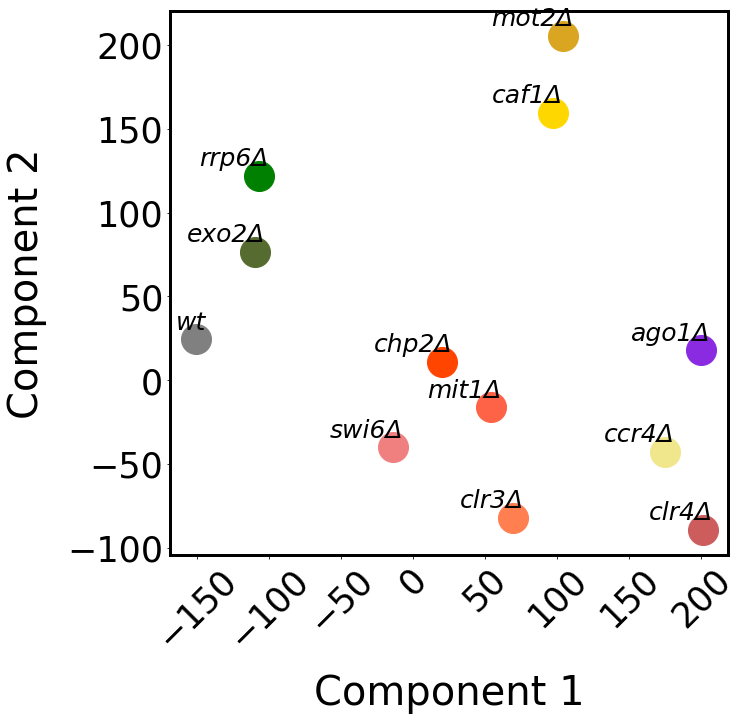

In [42]:
tsne_plot(
    chip_df, names, 
    labels=labels,
    title='',
    outpath=os.path.join(out_dir, 'tsne_polII_occupancy.png')
)

---

## **III.** **Transcription efficiency** (TE) and **Pol II ChIP occupancy** (PO)

- **Concatenate** both **Transcription efficiency** (TE) and **Pol II ChIP occupancy** (PO) data

In [43]:
#te_df.columns

In [44]:
#chip_df.columns

In [45]:
# concatenate rows
total = pd.concat([te_df, chip_df], sort=True) # Sorting because non-concatenation axis is not aligned.
total.head()
#total.columns

,1022,1168,301,302,324,491,504,510,523,530,544,638,80,WT,bio_type,category,gene_id,gene_name,length,type
849,0.599458,0.758049,0.552137,0.616837,0.496471,0.547371,0.519914,0.646237,0.160111,0.325390,0.929948,0.490776,0.517269,0.456759,mRNA,repeat,SPAC212.01c,NaN,920,gene
850,0.055001,0.090009,0.416357,0.602825,0.166183,0.428026,0.359026,0.342478,0.048943,1.511390,1.127091,0.153169,0.987225,0.261451,mRNA,repeat,SPAC212.02,NaN,411,gene
851,0.470537,0.366028,0.098509,0.178971,0.166127,0.199053,0.458976,0.356586,0.118416,0.490741,0.285874,0.087482,0.339385,0.050648,mRNA,repeat,SPAC212.03,NaN,466,gene
852,0.564789,0.568096,0.547024,0.543542,0.434323,0.399763,0.468490,0.615107,0.127927,0.384874,0.768424,0.471402,0.536182,0.442061,mRNA,repeat,SPAC212.04c,NaN,1670,gene
854,0.633723,0.270184,0.298995,1.030346,0.588477,0.457982,0.195845,0.885603,0.280192,0.248196,0.702742,1.330300,0.700311,0.110772,mRNA,repeat,SPAC212.06c,NaN,933,gene


In [46]:
total.shape

(50, 20)

### tSNE Transcription efficiency and Pol II ChIP occupancy - **Figure5-A_stranded**

- **Figure 5**: 
    - **(A)** tSNE plot showing two dimensional embedding of Pol II occupancy and transcription efficiency. Close proximity of mutants visualizes similarities in transcriptional silencing. 

- Plot 2-d `tSNE` **dimensionality reduction** from `~48 dim`

In [47]:
fig_dir = os.path.join(plots_dir, 'Figure5')
if not os.path.isdir(fig_dir):    
    !mkdir -p $fig_dir

In [48]:
out_dir = plots_dir
out_dir = fig_dir

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure5/Figure5-A_stranded.png


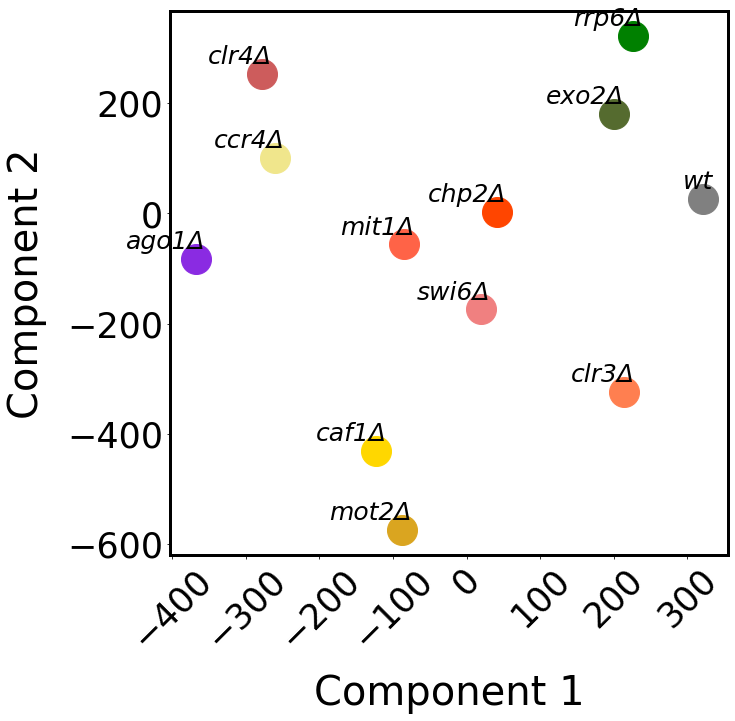

In [49]:
print(os.path.join(out_dir, 'Figure5-A_stranded.png'))
tsne_plot(
    total, names,
    labels=labels,
    title='',
    #perplexity = 2,
    perplexity = 4,
    outpath=os.path.join(out_dir, 'Figure5-A_stranded.png')
)

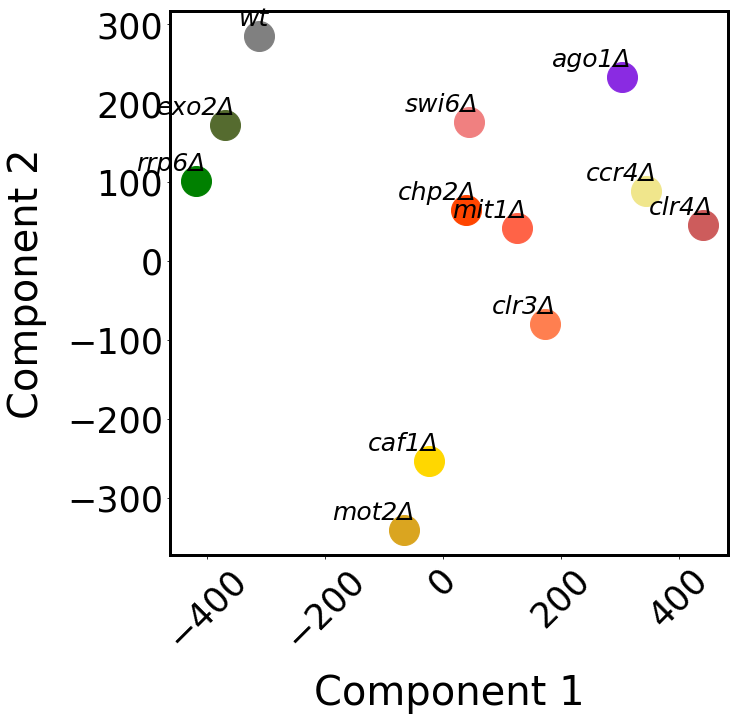

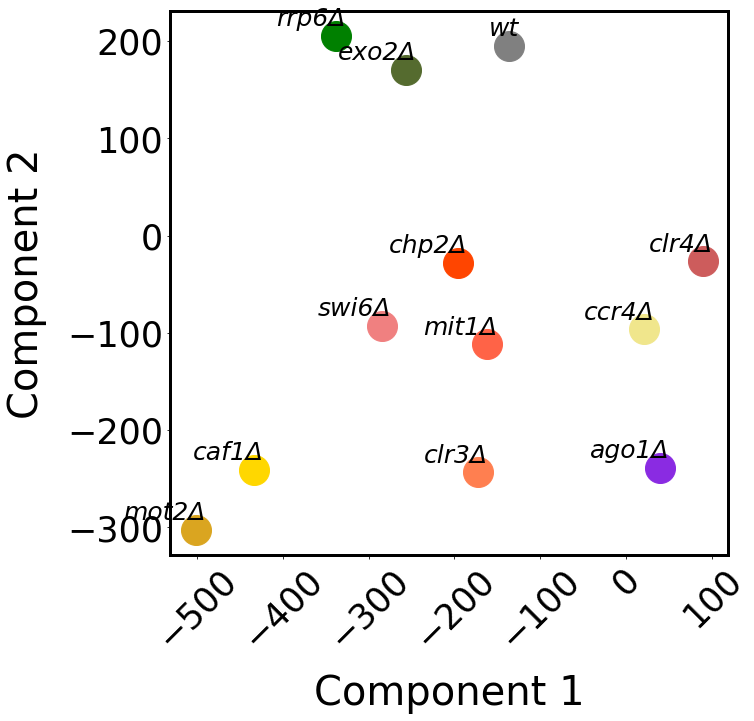

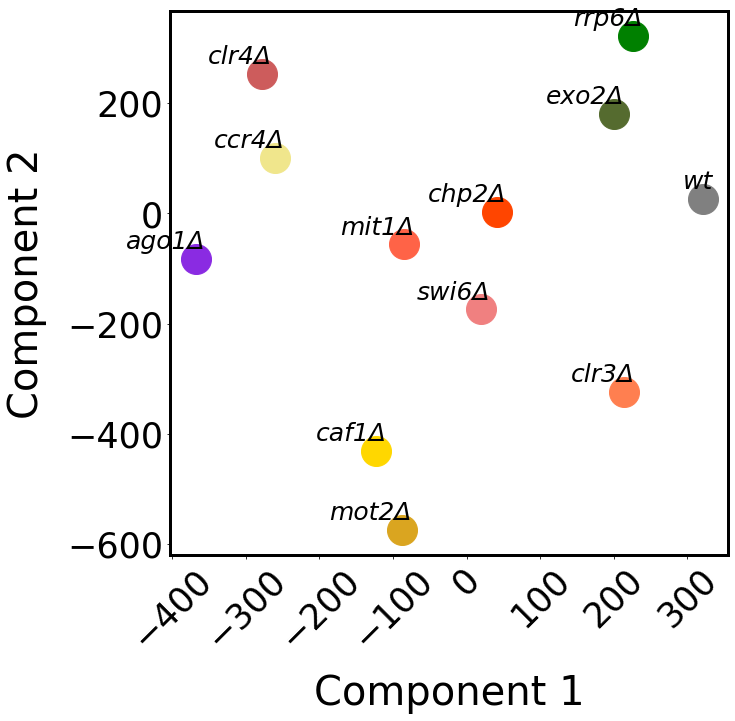

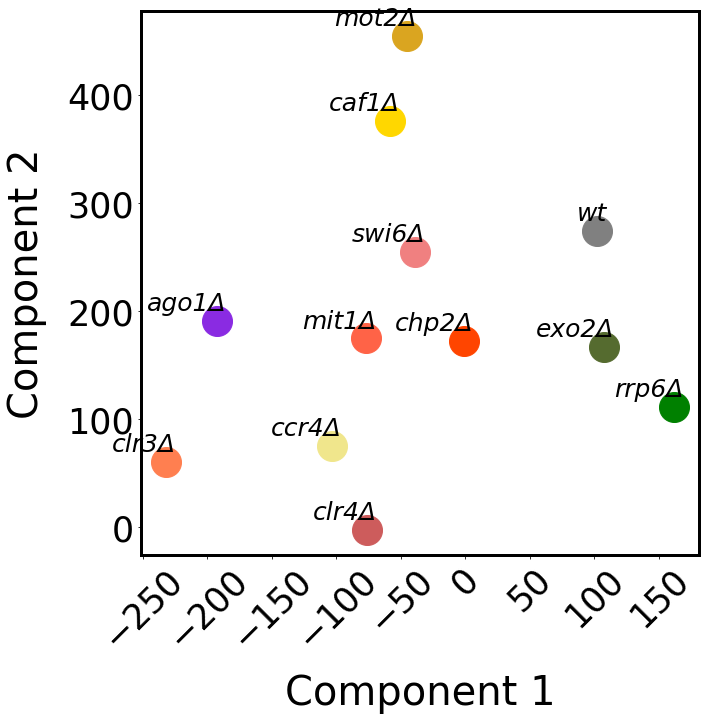

In [50]:
for pp in range(2, 6):
    tsne_plot(
        total, names,
        labels=labels,
        title='',
        perplexity = pp,
        outpath=os.path.join(out_dir, 'Figure5-A_stranded_perprexlity_' + str(pp) + '.png')
    )

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure5/Figure5-A_stranded_PCA.png


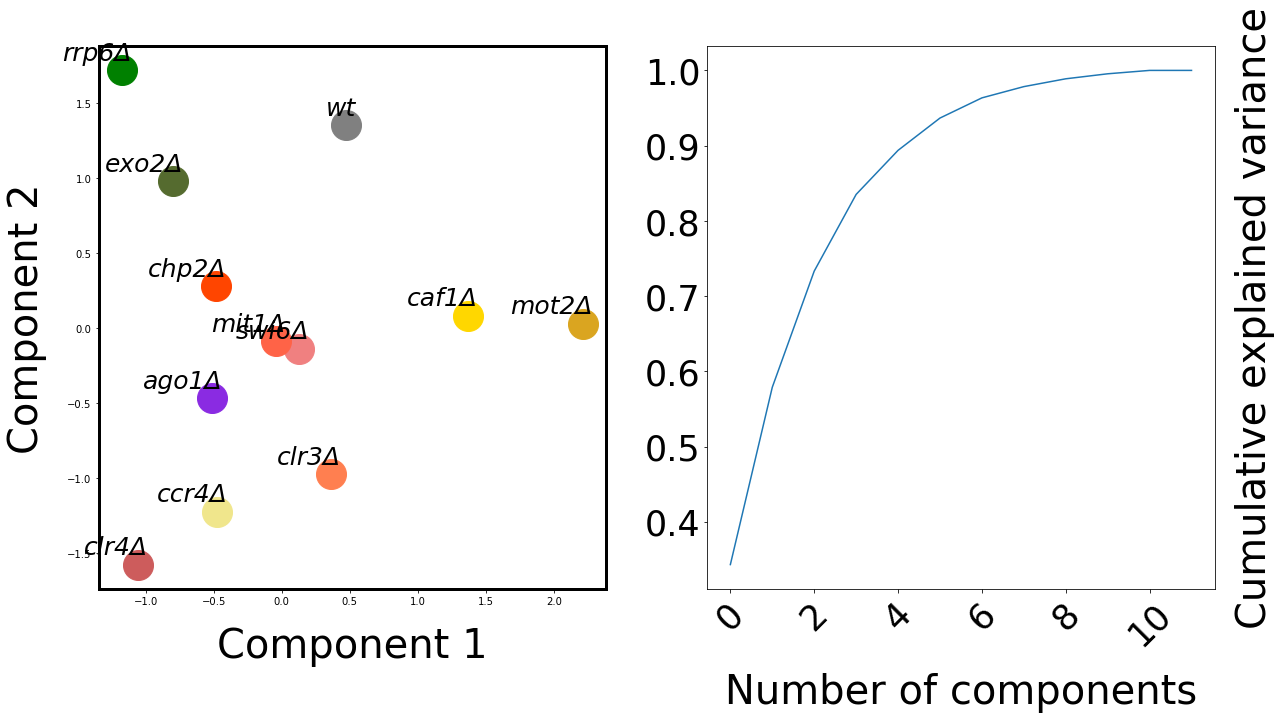

In [51]:
print(os.path.join(out_dir, 'Figure5-A_stranded_PCA.png'))
pca_plot(
    total, names,
    labels=labels,
    title='',
    outpath=os.path.join(out_dir, 'Figure5-A_stranded_PCA.png')
    #outpath=None
)
         

In [52]:
def pca_3dplot(df, names, labels=None, random_state=1, color=None, title='', outpath=None, **kwargs):

    # Adapted from: Gaël Varoquaux
    # License: BSD 3 clause

    from mpl_toolkits.mplot3d import Axes3D

    #np.random.seed(5)

    ## bad - I rather removed those.
    df = df.fillna(0)
    #df = df.dropna(how="any", subset=names)
    #import pdb; pdb.set_trace()
    
    # Data 
    X = df[names].values.T
    
    if not labels:
        labels = names
    
    fig = plt.figure(1, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    pca = PCA(n_components=3)
    pca.fit(X)
    X = pca.transform(X)
    
    for idx in range(0, len(names)):
        ax.text3D(X[idx, 0],
                  X[idx, 1] + 1.5,
                  X[idx, 2], 
                  #names[idx],
                  labels[idx],
                  horizontalalignment='center',
                  bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
        ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], 'o', c=color_map[names[idx]], edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    plt.show()

/gcm-lfs1/pablo/data/rna_silencing/results/Ratios/Plots_16-07-21/Figure5/Figure5-A_stranded_3dPCA.png


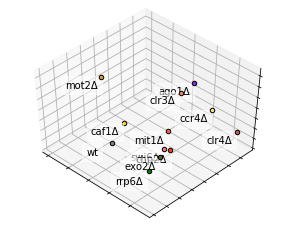

In [53]:
print(os.path.join(out_dir, 'Figure5-A_stranded_3dPCA.png'))
pca_3dplot(
    total, names,
    labels=labels,
    title='',
    outpath=os.path.join(out_dir, 'Figure5-A_stranded_3dPCA.png')
    #outpath=None
)